### This project involves creating a Machine Learning Linear Regression model that predicts apartment prices in Buenos Aires, Argentina -- with a focus on apartments that cost less than $400,000

Key objectives of this project are:

* Creating a linear regression model using the scikit-learn library.
* Building a data pipeline for imputing missing values and encoding categorical features.
* Improving model performance by reducing overfitting.
* Creating a dynamic dashboard for interacting with completed model.

### In the first part our goal is to establish a model based on relationship between the apartment size and its price

In [1]:
# Importing required libraries
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression # For building the model
from sklearn.metrics import mean_absolute_error # For evaluating the model

#### Creating a function to wrangle data

In [2]:
# Creating a function called wrangle to clean the csv files
# sometimes nothing is included inside parentheses(). If something is included it is called an argument (here a filepath)
# the `filepath` is generic here

def wrangle (filepath):
    # Read csv file into DataFrame
    df = pd.read_csv(filepath)
    return df    

In [3]:
# Assigning files to a global dataframe df and importing files using wrangle function.
# printing the shape of dataframe and observing first 5 rows
df = wrangle('buenos-aires-real-estate-1.csv')
print('df shape:', df.shape)
df.head()

df shape: (8606, 16)


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Argentina|Capital Federal|Villa Crespo|,"-34.6047834183,-58.4586812499",180000.0,USD,2729232.0,180000.0,120.0,110.0,1500.000000,1636.363636,NaN,4.0,NaN,http://villa-crespo.properati.com.ar/12egq_ven...
1,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,NaN,250000.0,USD,3790600.0,250000.0,117.0,120.0,2136.752137,2083.333333,NaN,4.0,NaN,http://ramos-mejia.properati.com.ar/s7pd_venta...
2,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Cast...,"-34.6497002,-58.658073",410000.0,USD,6216584.0,410000.0,410.0,220.0,1000.000000,1863.636364,NaN,NaN,NaN,http://castelar-moron.properati.com.ar/11vgn_v...
3,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|Tres de Fe...,"-34.5957086,-58.5669503",180000.0,USD,2729232.0,180000.0,200.0,135.0,900.000000,1333.333333,NaN,5.0,NaN,http://tres-de-febrero.properati.com.ar/7f7u_v...
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...


* It is important to note the distinction between the df in input 5, and the df used inside the wrangle function
* The scope of df inside the wrangle function is limited to that function, whereas the df just above is global

### We only want apartment properties in Buenos Aires ('Capital Federal'), which cost less than $400,000

In [4]:
# Creating a mask for subsetting properties with required parameters
mask_ba = df['place_with_parent_names'].str.contains('Capital Federal')
mask_ba.head()

0     True
1    False
2    False
3    False
4     True
Name: place_with_parent_names, dtype: bool

The rows we are interested in are marked as True

In [5]:
# Checking the new dataframe which only contains buenos aires ('Capital Federal')
df[mask_ba].head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Argentina|Capital Federal|Villa Crespo|,"-34.6047834183,-58.4586812499",180000.0,USD,2729232.0,180000.0,120.0,110.0,1500.000000,1636.363636,NaN,4.0,NaN,http://villa-crespo.properati.com.ar/12egq_ven...
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
11,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6050060697,-58.4001162302",60000.0,USD,909744.0,60000.0,28.0,28.0,2142.857143,2142.857143,NaN,1.0,NaN,http://once.properati.com.ar/zz0q_venta_depart...
18,sell,apartment,|Argentina|Capital Federal|Belgrano|,"-34.5646269,-58.4412741",600000.0,USD,9097440.0,600000.0,220.0,NaN,2727.272727,NaN,NaN,5.0,NaN,http://belgrano.properati.com.ar/jvge_venta_de...


In [6]:
# Overwriting the wrangle function to obtain properties in Buenos Aires
# This is being done again just to show the process. Changes can be made in the original function itself in input 3
def wrangle(filepath):
    df = pd.read_csv(filepath)
    
    # Subset to select only properties in 'Capital Federal'
    mask_ba = df['place_with_parent_names'].str.contains('Capital Federal')
    df = df[mask_ba]
    
    return df

In [7]:
# Checking the new dataframe which gets imported by modified wrangle function
df = wrangle('buenos-aires-real-estate-1.csv')
print('df shape:', df.shape)
df.head()

df shape: (2524, 16)


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Argentina|Capital Federal|Villa Crespo|,"-34.6047834183,-58.4586812499",180000.0,USD,2729232.0,180000.0,120.0,110.0,1500.000000,1636.363636,NaN,4.0,NaN,http://villa-crespo.properati.com.ar/12egq_ven...
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
11,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6050060697,-58.4001162302",60000.0,USD,909744.0,60000.0,28.0,28.0,2142.857143,2142.857143,NaN,1.0,NaN,http://once.properati.com.ar/zz0q_venta_depart...
18,sell,apartment,|Argentina|Capital Federal|Belgrano|,"-34.5646269,-58.4412741",600000.0,USD,9097440.0,600000.0,220.0,NaN,2727.272727,NaN,NaN,5.0,NaN,http://belgrano.properati.com.ar/jvge_venta_de...


It can be seen that now the `wrangle` function only imports rows which have properties based in Capital Federal

#### Now we only want apartments as property type and nothing else

In [8]:
# Checking the unique types of properties
df['property_type'].unique()

array(['apartment', 'house', 'PH', 'store'], dtype=object)

In [9]:
# Creating a mask for only apartment properties
mask_apt = df['property_type'] == 'apartment'
mask_apt.head()

0     True
4     True
9     True
11    True
18    True
Name: property_type, dtype: bool

In [10]:
# Now modifying the wrangle function again to insert this mask for only apartment properties
def wrangle(filepath):
    df = pd.read_csv(filepath)
    
    # Subset to select only properties in `"Capital Federal"`
    mask_ba = df['place_with_parent_names'].str.contains('Capital Federal')
    
    # Subset to only select `"apartment"` properties
    mask_apt = df['property_type'] == 'apartment'
    
    # Selecting properties included in both mask_ba and mask_apt dataframes
    df = df[mask_ba & mask_apt] 
    
    return df

In [11]:
# Checking the functionality of wrangle function
df = wrangle('buenos-aires-real-estate-1.csv')
print('df shape:', df.shape)
df.head()

df shape: (2068, 16)


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Argentina|Capital Federal|Villa Crespo|,"-34.6047834183,-58.4586812499",180000.0,USD,2729232.0,180000.0,120.0,110.0,1500.000000,1636.363636,NaN,4.0,NaN,http://villa-crespo.properati.com.ar/12egq_ven...
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
11,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6050060697,-58.4001162302",60000.0,USD,909744.0,60000.0,28.0,28.0,2142.857143,2142.857143,NaN,1.0,NaN,http://once.properati.com.ar/zz0q_venta_depart...
18,sell,apartment,|Argentina|Capital Federal|Belgrano|,"-34.5646269,-58.4412741",600000.0,USD,9097440.0,600000.0,220.0,NaN,2727.272727,NaN,NaN,5.0,NaN,http://belgrano.properati.com.ar/jvge_venta_de...


The function works as expected. We only have apartment properties in Capital Federal aka Buenos Aires

#### The last criteria was that we only want properties less than $400,000
NOTE: In python code to separate out large numbers such as currency an underscore can be used e.g.400000 can be written as 400_000 to make it clearer

In [12]:
df['currency'].unique()

array(['USD', nan, 'ARS'], dtype=object)

This means that we can not select the price column to check values less than 400_000. the `price_approx_usd` column needs to be considered

In [13]:
# Creating a mask for price
mask_price = df['price_aprox_usd'] < 400_000
mask_price.head()

0      True
4      True
9      True
11     True
18    False
Name: price_aprox_usd, dtype: bool

In [14]:
# Inserting this price mask to modify the wrangle function
def wrangle(filepath):
    
    # importing csv file
    df = pd.read_csv(filepath)
    
    # Subset to select only properties in `"Capital Federal"`
    mask_ba = df['place_with_parent_names'].str.contains('Capital Federal')
    
    # Subset to only select `"apartment"` properties
    mask_apt = df['property_type'] == 'apartment'
    
    # Subset to only select property values lower than USD 400_000
    mask_price = df['price_aprox_usd'] < 400_000
    
    # Selecting properties included in mask_ba and mask_apt and mask_price dataframes using `&`
    df = df[mask_ba & mask_apt & mask_price] 
    
    return df

In [15]:
# Checking the new dataframe we obtain from wrangle function
df = wrangle('buenos-aires-real-estate-1.csv')
print('df shape:', df.shape)
df.head()

df shape: (1781, 16)


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Argentina|Capital Federal|Villa Crespo|,"-34.6047834183,-58.4586812499",180000.0,USD,2729232.0,180000.0,120.0,110.0,1500.000000,1636.363636,NaN,4.0,NaN,http://villa-crespo.properati.com.ar/12egq_ven...
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
11,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6050060697,-58.4001162302",60000.0,USD,909744.0,60000.0,28.0,28.0,2142.857143,2142.857143,NaN,1.0,NaN,http://once.properati.com.ar/zz0q_venta_depart...
20,sell,apartment,|Argentina|Capital Federal|San Nicolás|,"-34.603898,-58.378617",69000.0,USD,1046205.6,69000.0,NaN,22.0,NaN,3136.363636,23.0,2.0,NaN,http://san-nicolas.properati.com.ar/rnju_venta...


So we have now managed to get only the desired properties in our dataframe: Apartments in Capital Federal with value less than USD 400_000

### Exploratory Data Analysis

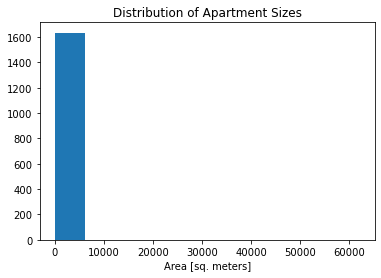

In [16]:
# Creating a Histogram to check relationship between price and area of property
plt.hist(df['surface_covered_in_m2'])
plt.xlabel('Area [sq. meters]')
plt.title('Distribution of Apartment Sizes');

This Histogram looks really different from what we expect normally. Since matplotlib creates axes automatically, it does mean that some outliers may exist in the house areas with majority having sizes below 10_000 sq m

In [17]:
# Checking outliers in data for surface covered in m2
df.describe()['surface_covered_in_m2']

count     1635.000000
mean        97.877064
std       1533.057610
min          0.000000
25%         38.000000
50%         50.000000
75%         73.000000
max      62034.000000
Name: surface_covered_in_m2, dtype: float64

It is clear that this data is extremely skewed. some properties have 0 area whereas some have area so much further from mean or median that they do not represent the data at all. These outliers need to be removed to build a realistic model

**Modifying wrangle function to remove outliers from the dataset. We would choose properties between 10 % and the 90% quantile**

In [18]:
# Checking the area values at 10% and 90% quantiles and assigning them to `low` and `high` variables
low, high = df['surface_covered_in_m2'].quantile([0.1, 0.9])
low,high

(31.0, 100.0)

In [19]:
# Creating a mask for area
mask_area = df['surface_covered_in_m2'].between(low, high)
mask_area.head()

0     False
4      True
9      True
11    False
20    False
Name: surface_covered_in_m2, dtype: bool

In [20]:
# Modifying the wrangle function
def wrangle(filepath):
    df = pd.read_csv(filepath)
     
    # Subset to select only properties in `"Capital Federal"`
    mask_ba = df['place_with_parent_names'].str.contains('Capital Federal')
    
    # Subset to only select `"apartment"` properties
    mask_apt = df['property_type'] == 'apartment'
    
    # Subset to only select property values lower than USD 400_000
    mask_price = df['price_aprox_usd'] < 400_000
    
    # Selecting properties included in mask_ba and mask_apt & mask_price dataframes using `&`
    df = df[mask_ba & mask_apt & mask_price] 
    
    # Removing outliers by only selecting properties with surface area values between 10% and 90% quantiles
    low, high = df['surface_covered_in_m2'].quantile([0.1, 0.9])
    mask_area = df['surface_covered_in_m2'].between(low, high)
    df = df[mask_area]
    
    return df

In [21]:
# Checking the modified dataframe generated by wrangle function
df = wrangle('buenos-aires-real-estate-1.csv')
print('df shape:', df.shape)
df.head()

df shape: (1343, 16)


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,sell,apartment,|Argentina|Capital Federal|Constitución|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364,http://constitucion.properati.com.ar/k2f0_vent...
41,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450,http://once.properati.com.ar/suwa_venta_depart...


### 1. Checking relationship between price and surface area of the apartment
using a Scatter Plot

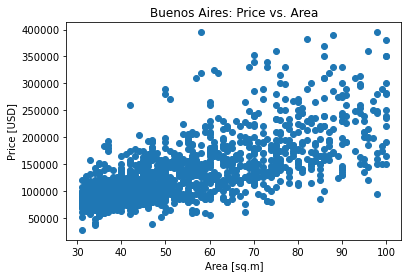

In [22]:
# Creating a scatterplot to visualise price as a function of area
plt.scatter(x = df['surface_covered_in_m2'], y = df['price_aprox_usd'])
plt.xlabel('Area [sq.m]')
plt.ylabel('Price [USD]')
plt.title('Buenos Aires: Price vs. Area');

*It can be seen that there is a moderate positive correlation between the area of the apartment and the price of apartment*

### Introduction to Linear Models
* Linear Models are all about straight lines
    * We attempt to draw a line which best fits our data, so that when we encounter a new apartment we can predict the price
* **Linear Models are really concerned with distance**
    * We wish to draw a line which minimises the distance between the straight line and the training data
* Linear models only work when the data has some linear relationship. But that's not always the case
    * During EDA if a Linear relationship can not be established, then it might be more suitable to use some other model which considers other factors than distance when training on data

### Splitting data into Feature Matrix and Target Vector
* **Features**: The attributes a model looks at to make predictions. Denoted by **X**
* **Target Vector**: The attribute being predicted. In this case price of the apartment. Denoted by **y**

In [23]:
# Creating feature matrix
features = ['surface_covered_in_m2'] # A list is used in feature matrix, and in target vector a string is used
X_train = df[features]
X_train.head()

,surface_covered_in_m2
4,70.0
9,42.0
29,54.0
40,42.0
41,50.0


In [24]:
# Creating Target Vector
target = 'price_aprox_usd' # a string is used because it is a one-dimensional vector
y_train = df[target]
y_train.head()

4     129000.0
9      87000.0
29    118000.0
40     57000.0
41     90000.0
Name: price_aprox_usd, dtype: float64

### Building a Linear Model
There are 3 different parts to building a model:
1. **Baseline**: It is done get a sense of how well the model needs to perform to be of any use to stakeholders.
    * Check if the problem is that of Regression (Target is a continuous value e.g Price of an apartment) or Classification (Target is one of the categories e.g. would an apartment sell in next 6 months or not)
        * We have a Regression problem here and we must first find what is the mean value of y_train
        * A baseline model is a naive/dumb model. The base model will only make a single prediction. In case of a Regression model a good prediction to make is mean price
    * Now that we have the one prediction that our dumb model will always make, we need to generate a list that repeats the prediction for every observation in our dataset
    * Assign a performance metric to the Baseline Model (here `Mean Absolute Error`)
    
2. **Iterate**: This stage of Model Building involves 3 steps:
    * **Instantiate**: Create a model that we can train
    * **Train**: Train the model
    * **Predict**: Predict the Target Vector using the Model
3. **Evaluate**:

In [25]:
y_mean = round(y_train.mean(), 2)
y_mean

135527.84

For our baseline model, every apartment's predicted price would be 135_527 USD

In [26]:
# Creating a list that repeats the prediction for every observation in baseline model
y_pred_baseline = [y_mean] * len(y_train) # We want the list to be as long as `y_train` dataset
y_pred_baseline[:5] # Checking first 5 values of the list 

[135527.84, 135527.84, 135527.84, 135527.84, 135527.84]

#### Assigning a performance metric to Baseline Model: `Mean Absolute Error` MAE
* MAE = **|y-yhat|/n** 
* A good Mean Absolute Error is somewhere around 0

In [27]:
# Calculating MAE
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print('Mean Apt Price:', round(y_mean, 2))
print('Baseline MAE:', round(mae_baseline, 2))

Mean Apt Price: 135527.84
Baseline MAE: 45199.46


If the predicted  price of an apartment is always \\$135,527.84, our predictions would be off by an average of \\$45,199.46. Our model needs to have mean absolute error below \\$45,199.46 in order to be useful. 

**Instantiating the Model**

In [28]:
model = LinearRegression()

**Training the Model**

In [29]:
model.fit(X_train, y_train)

LinearRegression()

**Generating Predictions**

In [30]:
y_pred_training = model.predict(X_train).round(2) # Checking how our model performs on the training data
y_pred_training[:5] # Checking first 5 predictions

array([169151.87, 106064.45, 133101.92, 106064.45, 124089.43])

**MAE Training**
Using Mean Absolute Error to evaluate model's prediction by comparing with training data

In [31]:
mae_training = mean_absolute_error(y_train, y_pred_training)
print('Training MAE:', round(mae_training, 2))

Training MAE: 31248.26


Our model beat the baseline by over $10,000. That's a good indicator that it will be helpful in predicting apartment prices

**Importing Test Data and generating a list of predictions using the model**

In [32]:
X_test = pd.read_csv('buenos-aires-test-features.csv')[features]
y_pred_test = model.predict(X_test).round(2)
y_pred_test[:5]

array([117330.06, 135355.04,  88039.47,  88039.47, 106064.45])

**NOTE:** 
* Ideally, test performance metrics should be the same as training performance metrics. In practice,however, test metrics tend to be a little worse (this means a larger number in the case of mean absolute error). But as long as the training and test performance are close to each other, we can be confident that our model will generalize well. 

* During the iteration phase, model can be changed and retrained multiple times to check model's training performance repeatedly. But once a model's test performance is evaluated, no further changes can be made. 
    
* A test only counts if neither the model nor the data scientist has seen the data before. If test metrics are checked first and then changes are made to the model, biases might be introduced into the model that compromise its generalizability. 

### Communicating Results
* The equation for a straight line is **y = b0 + b1x**
* Attributes in scikit's Linear Regression model end with an `_` (e.g. `coef_`, `intercept_` etc.), which means they can only be used once a model has been trained


In [33]:
# Extracting the intercept for our Linear Regression model's straight line
intercept = round(model.intercept_, 2)
print('Model Intercept:', intercept)

Model Intercept: 11433.31


In [34]:
# Calculating the coefficient of our Linear Model
coefficient = round(model.coef_[0], 2) # The coefficient appears as a list. Taking the first element in the list
print('Model coefficient for "surface_covered_in_m2":', coefficient)

Model coefficient for "surface_covered_in_m2": 2253.12


**Generating Equation of Linear Model**

In [37]:
# Using an f string which allows printing of character values and lets us insert variable names
print(f'apt_price = {intercept} + {coefficient} * surface_covered')

apt_price = 11433.31 + 2253.12 * surface_covered


**Visualise the Model on the Scatter Plot for effective communication**

In [ ]:
plt.plot(X_train, model.predict(X_train), color = 'red', label = 'Linear Model')
plt.scatter(X_train, y_train)
plt.xlabel("surface covered [sq. m]")
plt.ylabel("price [USD]")
plt.legend();